In [1]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as db
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import csv
from IPython.display import display
import seaborn as sns
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("sqlite3 version: {}".format(db.version))
import matplotlib
print(matplotlib.__version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
numpy version: 1.18.1
sqlite3 version: 2.6.0
3.1.3


In [2]:
start = time.time()
df=pd.read_csv('Crime_Responses.csv')
print ("\nFive random records from the `df` table:")
display(df.iloc[np.random.choice (len (df), 5)])


Five random records from the `df` table:


,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,Zip Code Boundaries,Longitude,2010 Census Tracts,Location,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
53925,214002995,Theft Petit - Other,02/15/2014 01:53:37 AM,02/15/2014 01:28:36 AM,1,Saturday,1,Saturday,GAINESVILLE,FL,...,7.0,-82.372617,32.0,POINT (-82.372617 29.63286),3.0,12.0,767.0,NaN,7.0,12.0
95509,214024242,Battery (simple – With Other Weapon),12/07/2014 10:15:57 AM,12/07/2014 08:36:56 AM,10,Sunday,8,Sunday,GAINESVILLE,FL,...,2.0,-82.381118,32.0,POINT (-82.381118 29.62005),3.0,12.0,767.0,NaN,7.0,12.0
70888,214000567,Information,01/11/2014 01:06:44 AM,01/11/2014 01:06:43 AM,1,Saturday,1,Saturday,GAINESVILLE,FL,...,7.0,-82.376450,32.0,POINT (-82.37645 29.63408),3.0,12.0,768.0,NaN,7.0,12.0
46409,212009536,Domestic Disturbance,05/08/2012 06:05:02 PM,05/08/2012 03:00:01 PM,18,Tuesday,15,Tuesday,GAINESVILLE,FL,...,2.0,-82.360918,23.0,POINT (-82.360918 29.620808),4.0,3.0,767.0,NaN,8.0,3.0
65045,213025792,Assault (aggravated),12/29/2013 03:56:37 AM,12/29/2013 03:50:36 AM,3,Sunday,3,Sunday,GAINESVILLE,FL,...,1.0,-82.333848,1.0,POINT (-82.333848 29.652063),1.0,1.0,772.0,2.0,14.0,1.0


In [3]:
df.describe()

,ID,Report Hour of Day,Offense Hour of Day,Latitude,Zip Code Boundaries,Longitude,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,Gainesville Enterprise Zone Boundaries,GPD Zones,Gainesville Fire Response Districts
count,1.603160e+05,160316.000000,160316.000000,160316.000000,159183.000000,160316.000000,159183.000000,156885.000000,159151.000000,159718.000000,58286.000000,155807.000000,159151.000000
mean,2.403214e+08,12.367237,12.126943,29.654120,4.247300,-82.341103,16.159621,2.287427,4.104951,824.350011,2.163573,9.561836,4.104951
std,9.701673e+07,6.790347,7.241094,0.137088,2.964405,0.135445,11.455160,1.187503,3.514260,119.092938,0.615107,5.005790,3.514260
min,1.187000e+03,0.000000,0.000000,25.455473,1.000000,-115.172957,1.000000,1.000000,1.000000,763.000000,1.000000,1.000000,1.000000
25%,2.130058e+08,8.000000,7.000000,29.638599,2.000000,-82.371144,7.000000,1.000000,1.000000,767.000000,2.000000,5.000000,1.000000
50%,2.150170e+08,13.000000,13.000000,29.653809,4.000000,-82.337668,13.000000,2.000000,3.000000,770.000000,2.000000,10.000000,3.000000
75%,2.180063e+08,18.000000,18.000000,29.670931,7.000000,-82.319363,24.000000,3.000000,6.000000,772.000000,2.000000,14.000000,6.000000
max,9.214003e+09,23.000000,23.000000,44.243549,11.000000,-71.013748,45.000000,4.000000,12.000000,1085.000000,5.000000,18.000000,12.000000


In [4]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Zip Code Boundaries', 'Longitude', '2010 Census Tracts', 'Location',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.loc[df['City'].str.contains('gai',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GANI',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('GVIL',na=False, case=False), 'City'] = 'GAINESVILLE'
df.loc[df['City'].str.contains('UNIV',na=False, case=False), 'City'] = 'GAINESVILLE'


In [7]:
df['Address']=df['Address'].replace({'BLK':''}, regex=True)
df.loc[df['City'].str.contains('UNIC',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('UNIN',na=False, case=False), 'City'] = 'UNICORERATED'
df.loc[df['City'].str.contains('ALACH',na=False, case=False), 'City'] = 'ALACHUA'
df.loc[df['City'].str.contains('COU',na=False, case=False), 'City'] = 'COUTNY'
df.loc[df['City'].str.contains('HAW',na=False, case=False), 'City'] = 'HAWTHORN'
df.loc[df['City'].str.contains('HIGH',na=False, case=False), 'City'] = 'HIGHSPRINGS'
df.loc[df['City'].str.contains('NEW',na=False, case=False), 'City'] = 'NEWBERRY'

In [8]:
len(set(df['City']))

76

GAINESVILLE      159121
UNICORERATED        236
COUTNY              201
ALACHUA             185
NEWBERRY            115
HIGHSPRINGS          85
HAWTHORN             81
MICANOPY             56
ARCHER               55
WALDO                28
DAYTONA BEACH        14
MELROSE               7
ST AUGUSTINE          7
ORANGE PARK           6
OCALA                 6
PANAMA CITY           5
WILLISTON             4
FT WHITE              4
BROOKER               4
CHIEFLAND             3
Name: City, dtype: int64

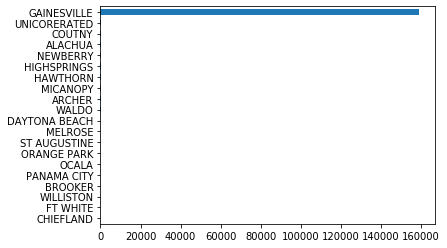

In [9]:
df.City.value_counts().iloc[:20].sort_values().plot(kind= 'barh')

df.City.value_counts().iloc[:20]

In [10]:
df.isnull().sum()

ID                                             0
Incident Type                                  0
Report Date                                    0
Offense Date                                   0
Report Hour of Day                             0
Report Day of Week                             0
Offense Hour of Day                            0
Offense Day of Week                            0
City                                          22
State                                          0
Address                                        0
Latitude                                       0
Zip Code Boundaries                         1133
Longitude                                      0
2010 Census Tracts                          1133
Location                                     598
Commission Districts                        3431
Gainesville Police Districts                1165
Florida Census Zip Codes                     598
Gainesville Enterprise Zone Boundaries    102030
GPD Zones           

In [11]:
df['OffenseDate']=pd.to_datetime(df['Offense Date'])
df['ReportDate']=pd.to_datetime(df['Report Date'])


In [12]:
df['ODate']=df['OffenseDate'].dt.date
df['DOhour']=df['OffenseDate'].dt.strftime("%Y-%b-%d %H")
df['DOmonth']=df['OffenseDate'].dt.strftime("%Y-%b")
df['RDate']=df['ReportDate'].dt.date
df['DRhour']=df['ReportDate'].dt.strftime("%Y-%b-%d %H")
df['DRmonth']=df['ReportDate'].dt.strftime("%Y-%b")


#convert time variables

df['Oyear']=df['OffenseDate'].dt.strftime("%Y")
df['Omonth']=df['OffenseDate'].dt.strftime("%m")
df['Oday']=df['OffenseDate'].dt.strftime("%d")

df['Ryear']=df['ReportDate'].dt.strftime("%Y")
df['Rmonth']=df['ReportDate'].dt.strftime("%m")
df['Rday']=df['ReportDate'].dt.strftime("%d")

In [13]:
df['Oyear']=df['OffenseDate'].dt.strftime("%Y").astype(int)
df['Omonth']=df['OffenseDate'].dt.strftime("%m").astype(int)
df['Oday']=df['OffenseDate'].dt.strftime("%d").astype(int)

df['Ryear']=df['ReportDate'].dt.strftime("%Y").astype(int)
df['Rmonth']=df['ReportDate'].dt.strftime("%m").astype(int)
df['Rday']=df['ReportDate'].dt.strftime("%d").astype(int)

df['delayyear']=df['Ryear']-df['Oyear']

df['delaymon']=df['Rmonth']-df['Omonth']
df['delayday']=df['Rday']-df['Oday']

In [14]:
df['delay']=df['delayyear']*365+df['delaymon']*30+df['delayday']

In [15]:
df=df.drop(columns=['delayyear', 'delaymon', 'delayday'])

In [18]:
df.to_csv('totaltimeserismonth0414.csv', index = None, header=True)

In [19]:
df.columns

Index(['ID', 'Incident Type', 'Report Date', 'Offense Date',
       'Report Hour of Day', 'Report Day of Week', 'Offense Hour of Day',
       'Offense Day of Week', 'City', 'State', 'Address', 'Latitude',
       'Zip Code Boundaries', 'Longitude', '2010 Census Tracts', 'Location',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts', 'OffenseDate',
       'ReportDate', 'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour',
       'DRmonth', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday',
       'delay'],
      dtype='object')

In [20]:
df.head(2)

,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,220005926,Death Investigation,04/30/2020 04:15:57 PM,04/30/2020 03:06:00 PM,16,Thursday,15,Thursday,GAINESVILLE,FL,...,2020-04-30,2020-Apr-30 16,2020-Apr,2020,4,30,2020,4,30,0
1,220005929,Stolen Vehicle (other),04/30/2020 05:02:31 PM,01/03/2020 12:00:00 AM,17,Thursday,0,Friday,GAINESVILLE,FL,...,2020-04-30,2020-Apr-30 17,2020-Apr,2020,1,3,2020,4,30,117


In [21]:
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:12:55.18


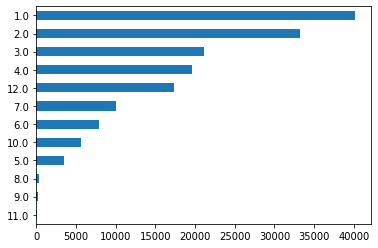

In [22]:
df['Gainesville Police Districts'].value_counts().iloc[:20].sort_values().plot(kind= 'barh')

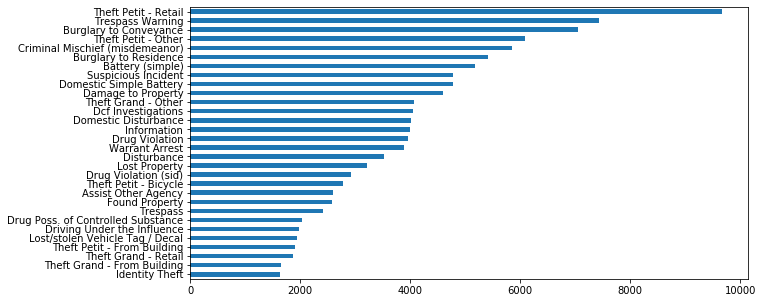

In [23]:
plt.figure(figsize=(10,5)) 
df['Incident Type'].value_counts().iloc[:30].sort_values().plot(kind= 'barh')

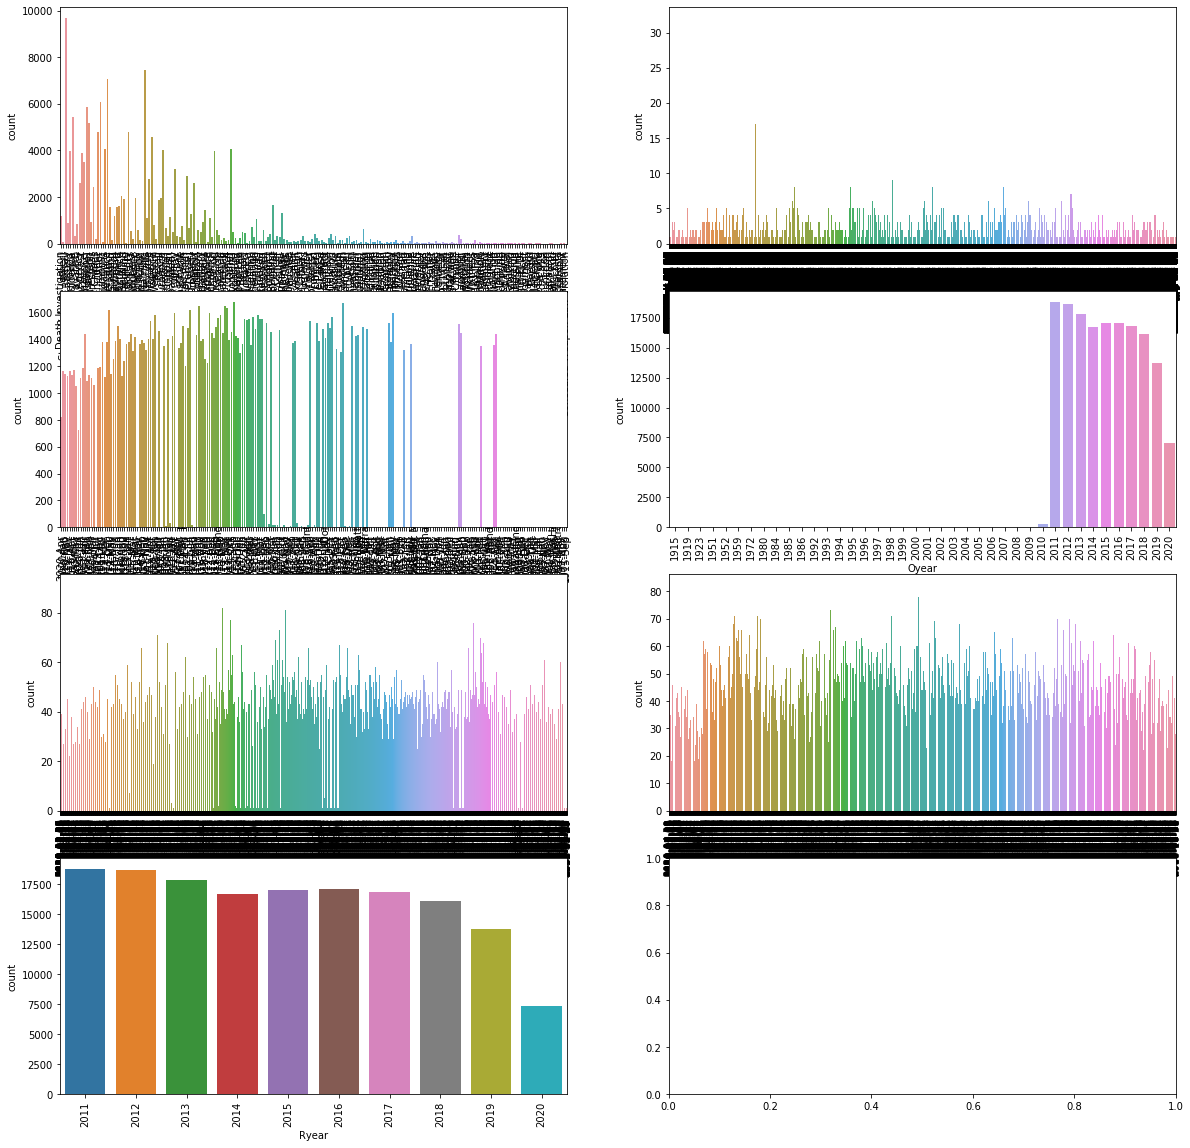

In [24]:
categorical = [ 'Incident Type', 'DOhour', 'DOmonth', 'Oyear','ODate','RDate','Ryear']

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [25]:
df=df.replace({'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3,'Friday':5})

df['Report Day of Week'] = df['Report Day of Week'].astype('category').cat.as_ordered()
df['Offense Day of Week'] = df['Offense Day of Week'].astype('category').cat.as_ordered()



In [26]:
#df.to_csv(r'C:\Users\chunx\crime\totaltimeserismonth0414.csv', index = None, header=True)

categorical=['Offense Day of Week', 'Report Day of Week']
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    #for label in subplot.get_xticklabels():
        #label.set_rotation(90)

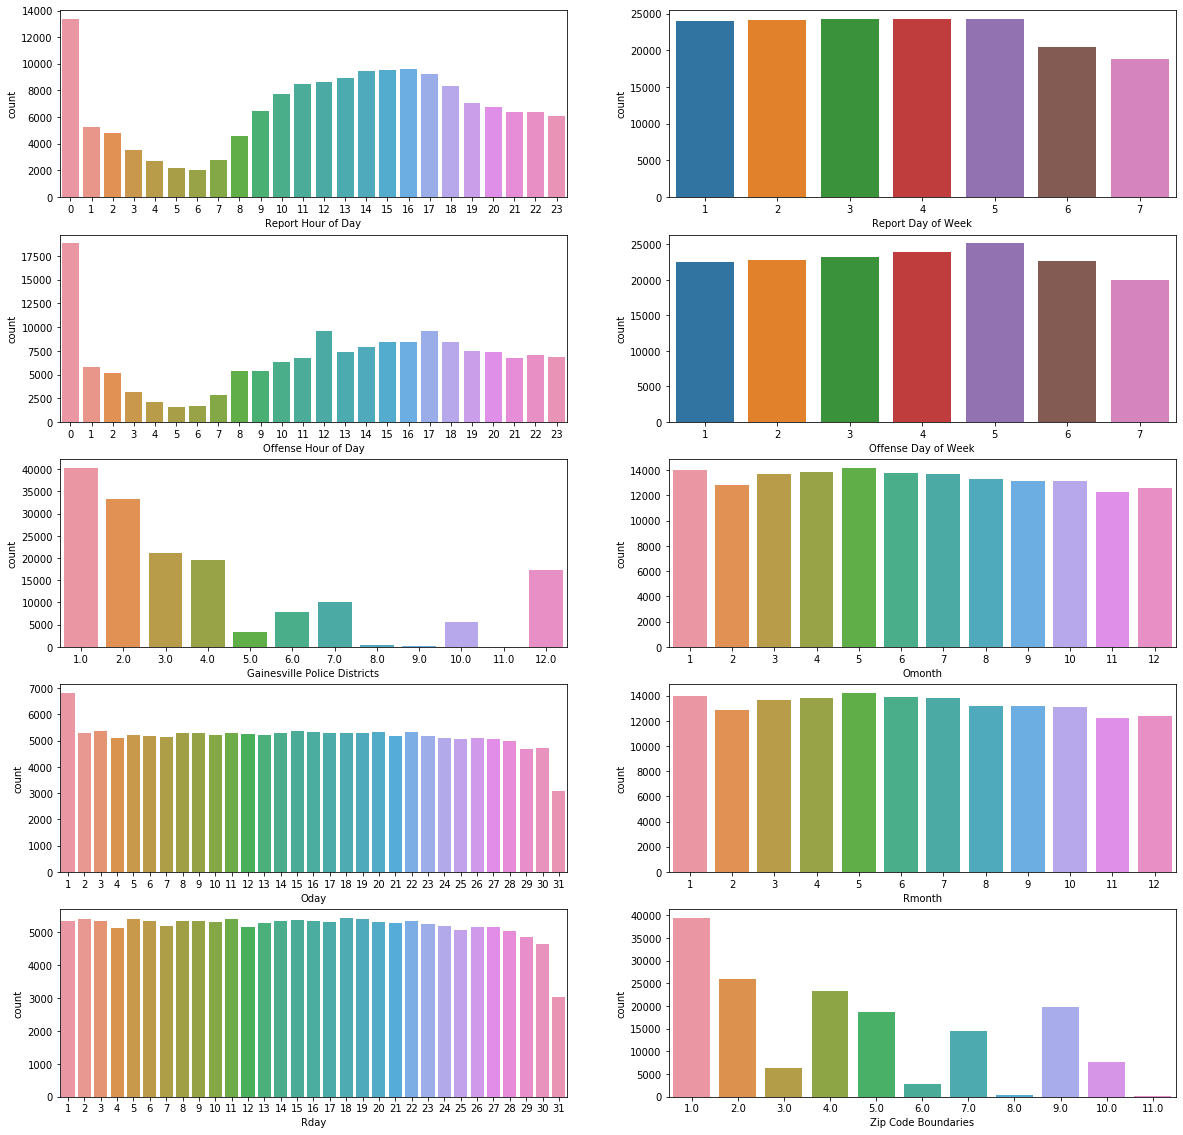

In [27]:
variableset2 = [ 'Report Hour of Day', 'Report Day of Week','Offense Hour of Day', 
'Offense Day of Week','Gainesville Police Districts','Omonth', 'Oday','Rmonth', 'Rday','Zip Code Boundaries']

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(variableset2, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)


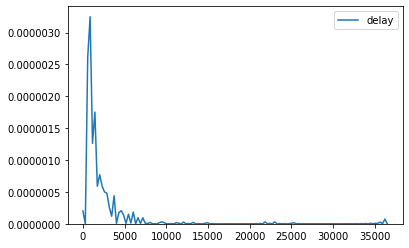

In [28]:
df['delay'].describe()

sns.kdeplot(df['delay'])

In [29]:
df['ID'] = df['ID'].astype('category').cat.as_ordered()


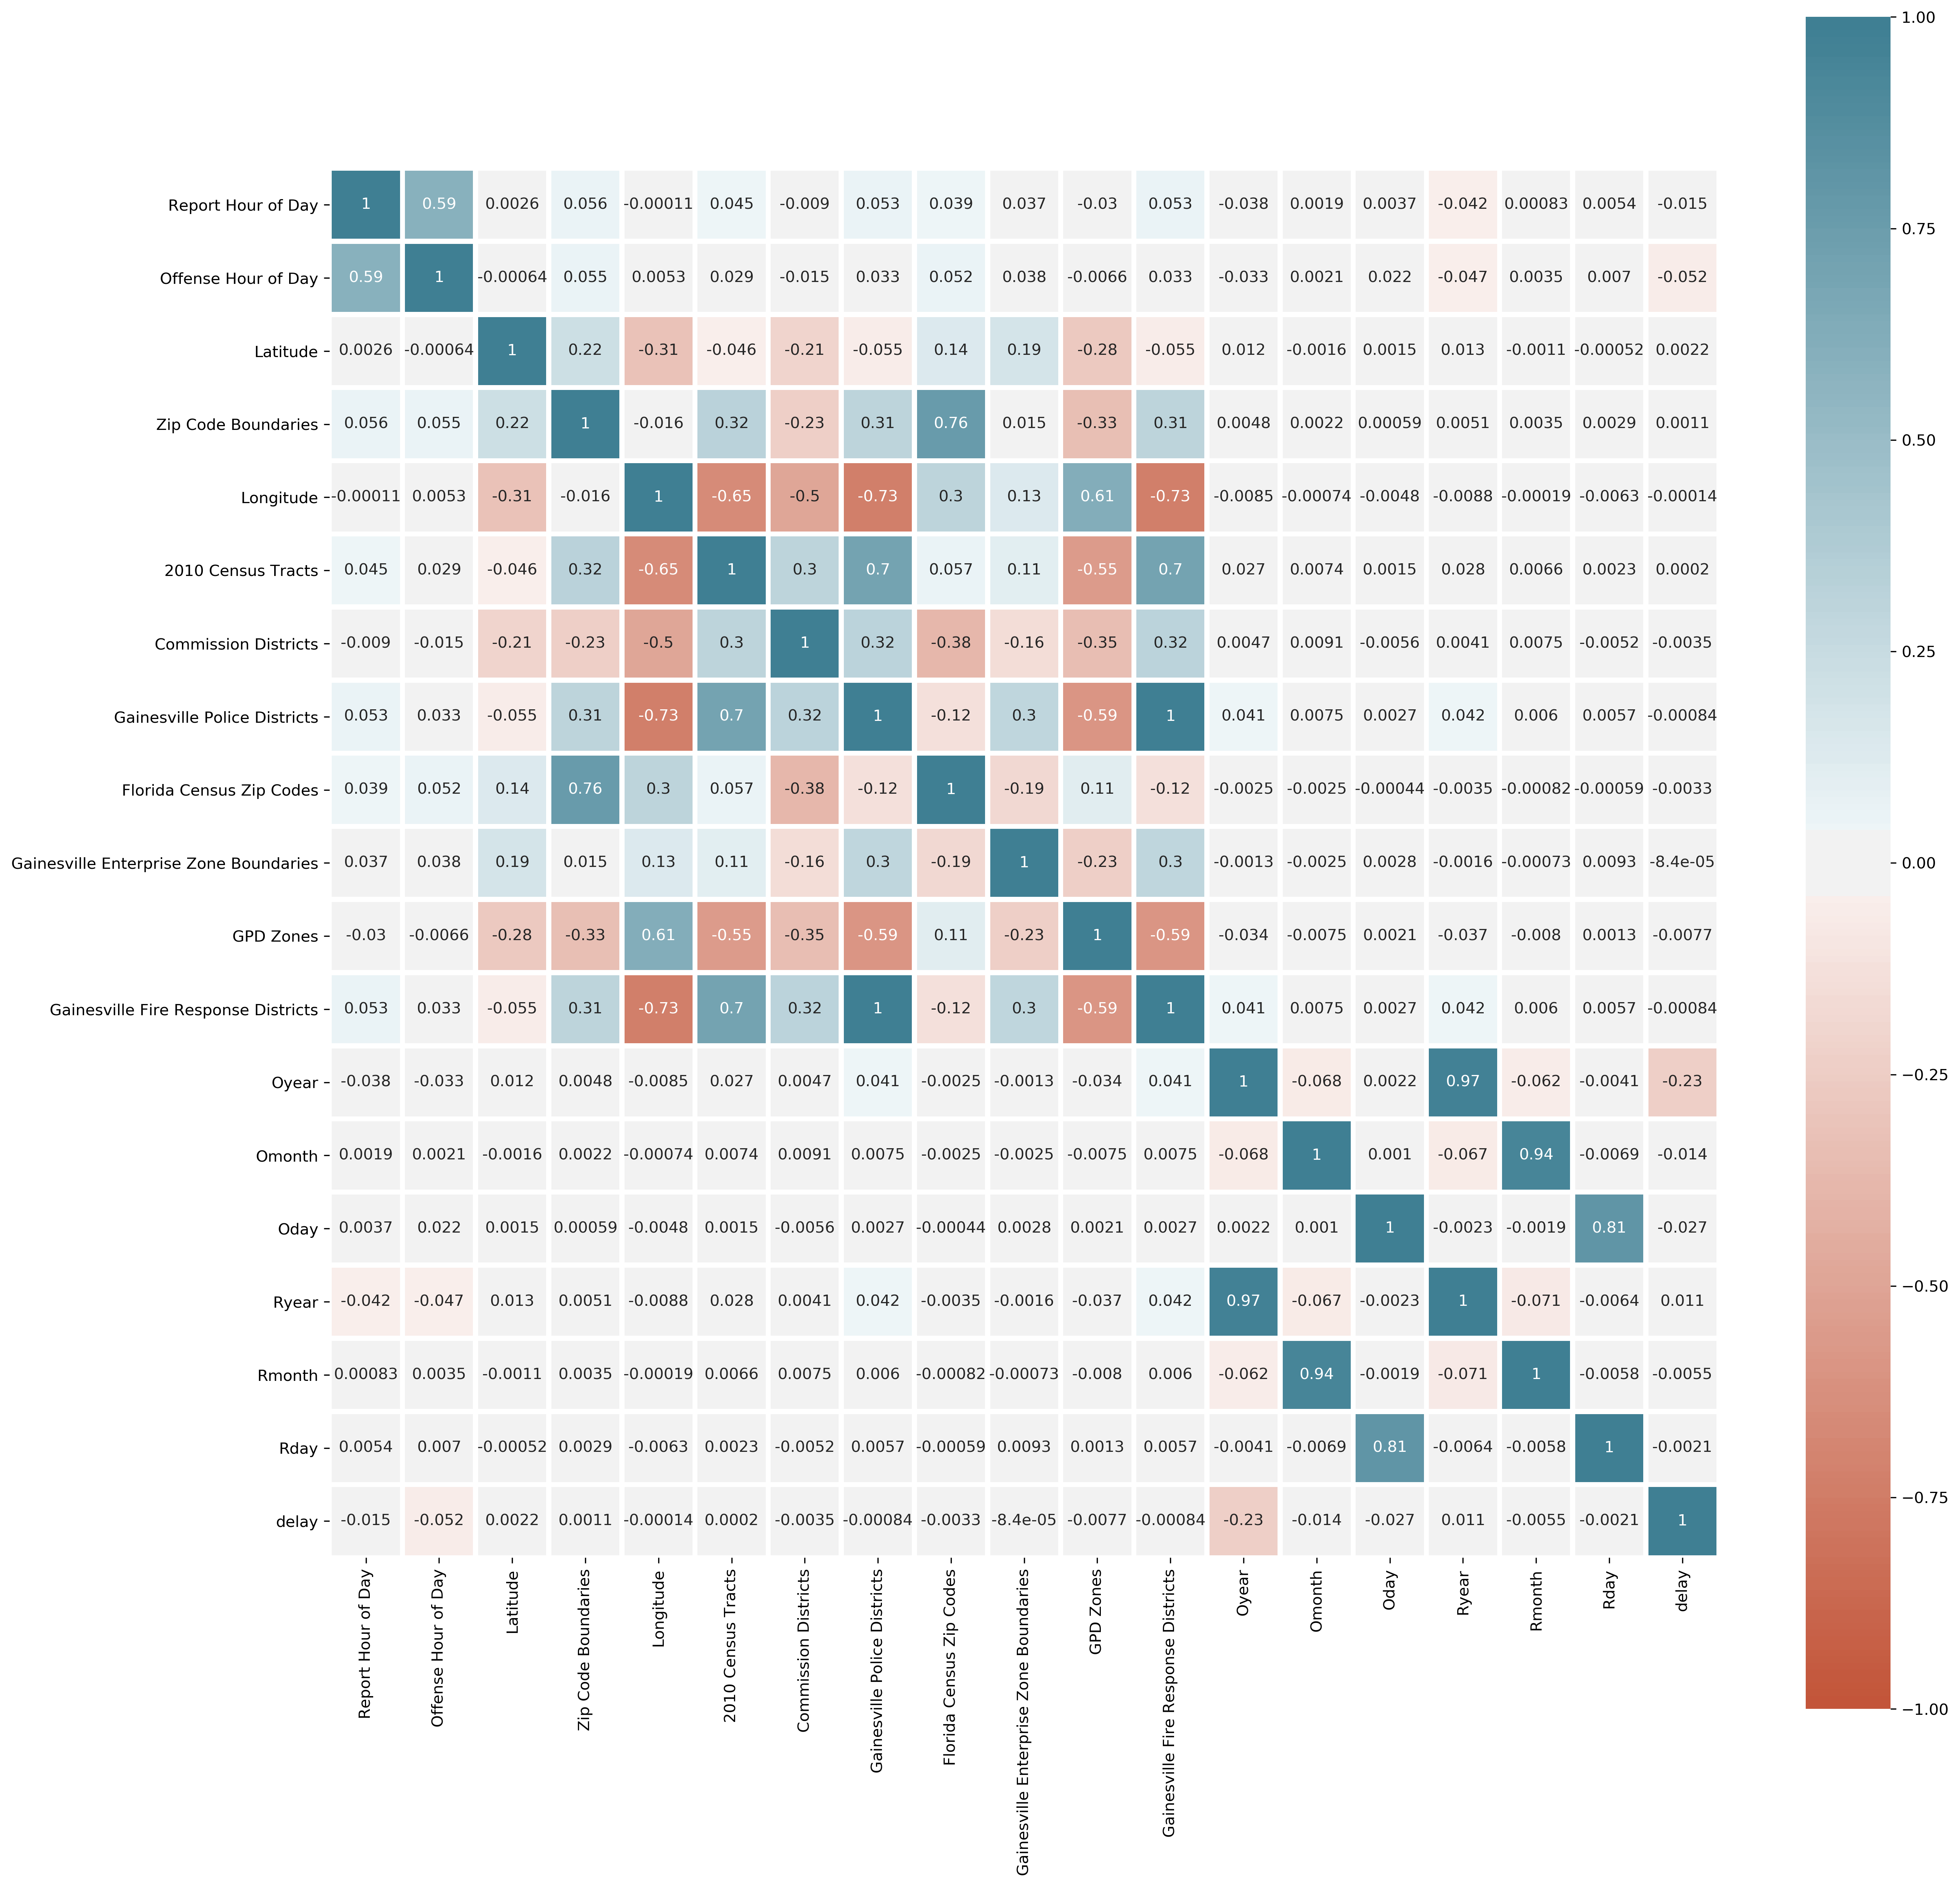

In [30]:
plt.figure(figsize = (20,20),dpi=300)
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, fmt='.2g',
            linewidths=3, linecolor='white',square=True, #cbar_kws= {'orientation': 'horizontal'}, 
            #mask=np.triu(df.corr())
           )
#plt.savefig("seaborn_heatmap_single_allvarables.png")

In [31]:
numerical=['Report Hour of Day', 'Offense Hour of Day', 'Latitude', 'Longitude','Gainesville Police Districts', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay']
categorical=[ele for ele in df.columns if ele not in numerical]


00:03:04.25


<Figure size 3600x3600 with 0 Axes>

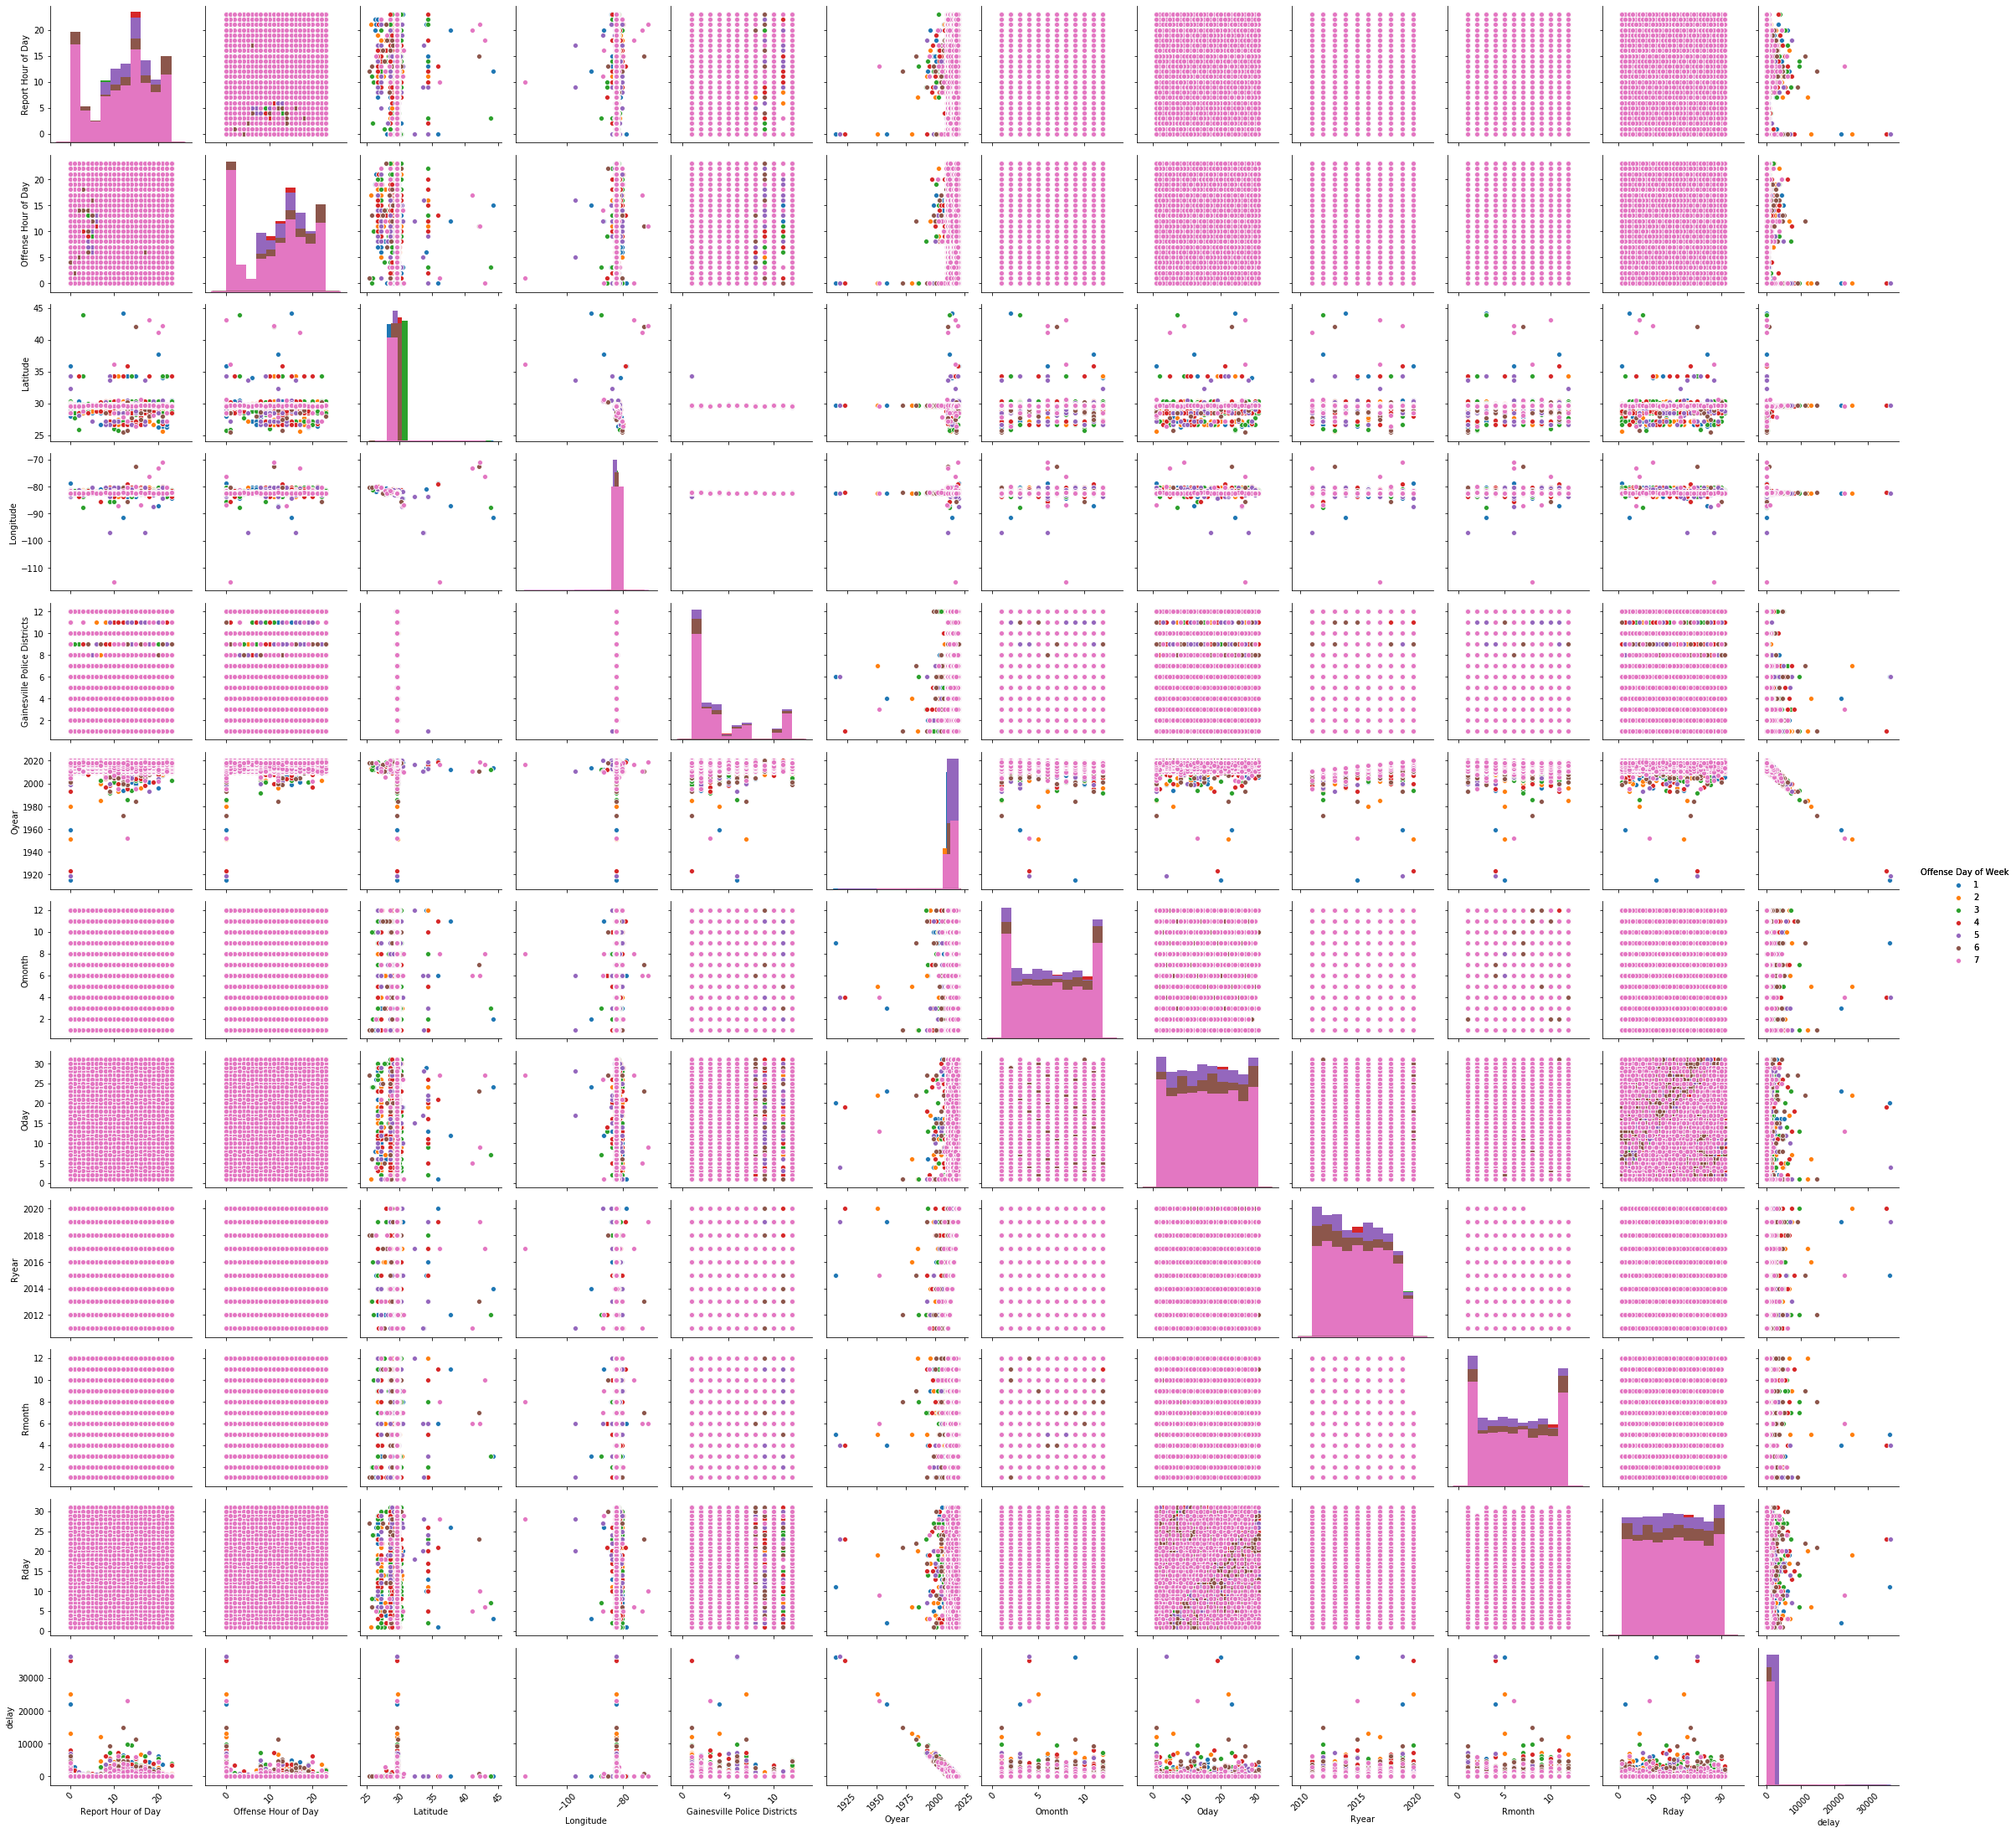

In [32]:
import warnings
warnings.filterwarnings('ignore')
start = time.time()
plt.figure(figsize = (50,50))
g = sns.pairplot(df, vars=df[numerical], hue="Offense Day of Week") 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [33]:
# file for top5 model
sum(df['Incident Type'].value_counts().iloc[:5])/len(df)

list = df['Incident Type'].value_counts().iloc[:5].index

list

Index(['Theft Petit - Retail', 'Trespass Warning', 'Burglary to Conveyance',
       'Theft Petit - Other', 'Criminal Mischief (misdemeanor)'],
      dtype='object')

In [34]:
df['Incident Type'].value_counts().iloc[:5]

df2=df[df['Incident Type'].isin(list)]

df2.duplicated().sum()

df2.drop_duplicates(keep=False,inplace=True)
df2=df2.drop(columns=['Commission Districts'])

df2=df2.dropna(how='any')

set(df2['Incident Type'])

{'Burglary to Conveyance',
 'Criminal Mischief (misdemeanor)',
 'Theft Petit - Other',
 'Theft Petit - Retail',
 'Trespass Warning'}

In [35]:
df2.shape

(12582, 36)

In [37]:
df2.to_csv ('cityforML5top', index = None, header=True)